In [1]:
import numpy as np
from pysheds.rfsm import RFSM
from pysheds.grid import Grid

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Load DEM

In [2]:
grid = Grid.from_raster('../data/roi_10m', data_name='dem')
dem = grid.view('dem')[30:130, 280:350]

# Generate RFSM data structure

In [3]:
rfsm = RFSM(dem)

## Apply RFSM with 0.1 meters of uniformly distributed water

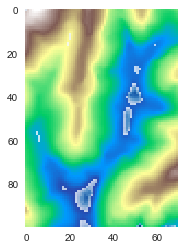

In [4]:
rfsm.reset_volumes()
input_vol = 0.1*900*np.ones(dem.shape)
waterlevel = rfsm.compute_waterlevel(input_vol)
plt.imshow(np.where(waterlevel, waterlevel - dem, np.nan), zorder=2, cmap='Blues', alpha=0.8)
plt.imshow(dem, zorder=1, cmap='terrain')

## Apply RFSM with 0.25 meters of uniformly distributed water

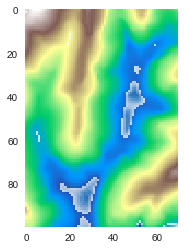

In [5]:
rfsm.reset_volumes()
input_vol = 0.25*900*np.ones(dem.shape)
waterlevel = rfsm.compute_waterlevel(input_vol)
plt.imshow(np.where(waterlevel, waterlevel - dem, np.nan), zorder=2, cmap='Blues', alpha=0.8)
plt.imshow(dem, zorder=1, cmap='terrain')

## Apply RFSM with 1 meter of uniformly distributed water

In [6]:
rfsm.reset_volumes()
input_vol = 1*900*np.ones(dem.shape)
waterlevel = rfsm.compute_waterlevel(input_vol)

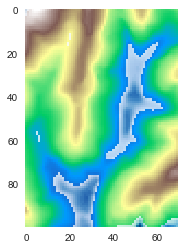

In [7]:
plt.imshow(np.where(waterlevel, waterlevel - dem, np.nan), zorder=2, cmap='Blues', alpha=0.8)
plt.imshow(dem, zorder=1, cmap='terrain')

## Visualize result in 3D

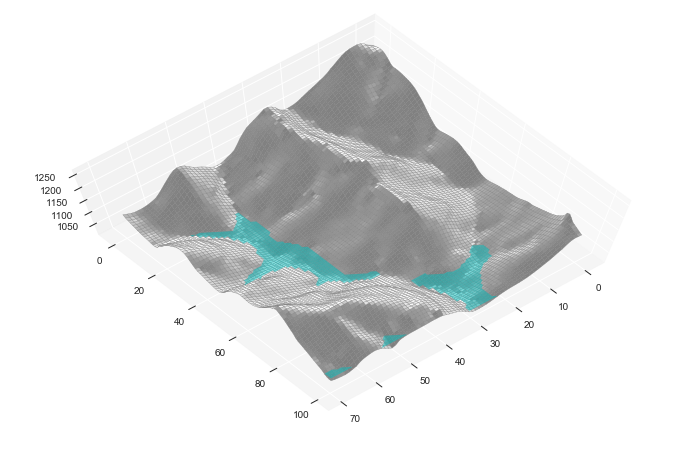

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
plt.gca().patch.set_facecolor('white')

# Make data.
X = np.arange(dem.shape[1])
Y = np.arange(dem.shape[0])
X, Y = np.meshgrid(X, Y)
w = np.where(waterlevel, waterlevel, np.nan)
w.flat[0] = np.nan

# Plot the surface.
surf1 = ax.plot_surface(X, Y, dem, rstride=1, cstride=1, color='0.99', antialiased=True, edgecolor='0.5')
surf2 = ax.plot_surface(X, Y, w, rstride=1, cstride=1, color='c', antialiased=True, alpha=0.5, shade=False)

ax.view_init(75, 50)
plt.savefig('./img/rfsm_3d.png', bbox_inches='tight')

# Load larger DEM

In [9]:
grid = Grid.from_raster('../data/roi_10m', data_name='dem')
dem = grid.view('dem')

# Generate RFSM data structure

In [10]:
rfsm = RFSM(dem)

## Apply RFSM with 4 meters of uniformly distributed water

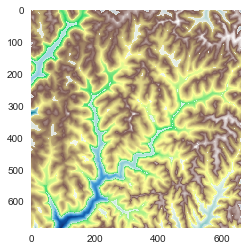

In [11]:
rfsm.reset_volumes()
input_vol = 4*900*np.ones(dem.shape)
waterlevel = rfsm.compute_waterlevel(input_vol)
plt.imshow(np.where(waterlevel, waterlevel - dem, np.nan), zorder=2, cmap='Blues', alpha=0.8)
plt.imshow(dem, zorder=1, cmap='terrain')

# Plot result in 3D

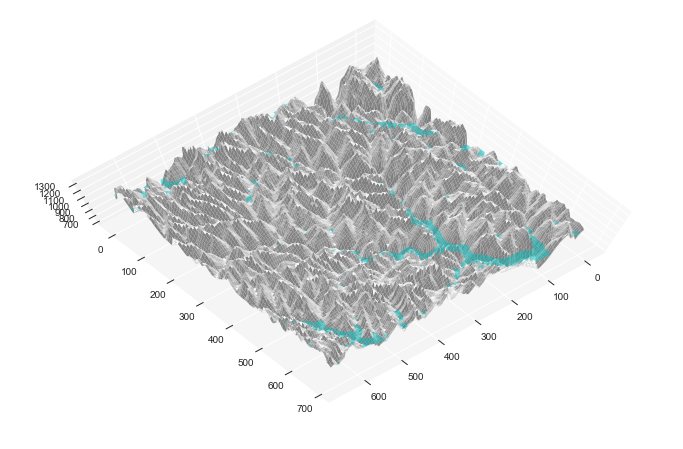

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
plt.gca().patch.set_facecolor('white')

# Make data.
X = np.arange(dem.shape[1])
Y = np.arange(dem.shape[0])
X, Y = np.meshgrid(X, Y)
w = np.where(waterlevel, waterlevel, np.nan)
w.flat[0] = np.nan

# Plot the surface.
surf1 = ax.plot_surface(X, Y, dem, rstride=5, cstride=5, color='0.99', antialiased=True)
surf2 = ax.plot_surface(X, Y, w, color='c', antialiased=True, alpha=0.5, shade=False)

ax.view_init(80, 50)